In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation

from keras import backend as K

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

import numpy as np
np.random.seed(8)
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# 특정 클래스에 대한 정밀도
def single_class_precision(interesting_class_id):
    def prec(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        precision_mask = K.cast(K.equal(class_id_pred, interesting_class_id), 'int32')
        class_prec_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * precision_mask
        class_prec = K.cast(K.sum(class_prec_tensor), 'float32') / K.cast(K.maximum(K.sum(precision_mask), 1), 'float32')
        return class_prec
    return prec

# 특정 클래스에 대한 재현율
def single_class_recall(interesting_class_id):
    def recall(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        recall_mask = K.cast(K.equal(class_id_true, interesting_class_id), 'int32')
        class_recall_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * recall_mask
        class_recall = K.cast(K.sum(class_recall_tensor), 'float32') / K.cast(K.maximum(K.sum(recall_mask), 1), 'float32')
        return class_recall
    return recall

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
                                   

train_generator = train_datagen.flow_from_directory(
        'C:/Users/Owner2/Desktop/deep/train',
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'C:/Users/Owner2/Desktop/deep/test',
        target_size=(150, 150),    
        batch_size=16,
        class_mode='categorical')


Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [4]:
# 1. 데이터셋 생성하기
#(x_train, y_train), (x_test, y_test) = load_data()
#x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
#x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

In [5]:
#모델 구성하기
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()

W1128 01:01:09.358660  8772 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1128 01:01:09.376144  8772 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1128 01:01:09.379157  8772 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1128 01:01:09.394152  8772 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [6]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#%matplotlib inline

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', 
              metrics=['accuracy',
                       single_class_precision(0), single_class_recall(0),
                       single_class_precision(1), single_class_recall(1),
                       single_class_precision(2), single_class_recall(2),
                       single_class_precision(3), single_class_recall(3),
                       single_class_precision(4), single_class_recall(4),
                       single_class_precision(5), single_class_recall(5),
                       single_class_precision(6), single_class_recall(6),
                       single_class_precision(7), single_class_recall(7),
                       single_class_precision(8), single_class_recall(8)])

W1128 01:02:37.015425  8772 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1128 01:02:37.036646  8772 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
# 4. 모델 학습시키기
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=test_generator,
        validation_steps=50)

W1128 01:02:55.854873  8772 deprecation.py:323] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1128 01:02:55.923889  8772 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 97s 965ms/step - loss: 1.5979 - acc: 0.4078 - prec: 0.3123 - recall: 0.3272 - prec_1: 0.3807 - recall_1: 0.3950 - prec_2: 0.4177 - recall_2: 0.5708 - prec_3: 0.4671 - recall_3: 0.7239 - prec_4: 0.3444 - recall_4: 0.4328 - prec_5: 0.1974 - recall_5: 0.2566 - prec_6: 0.2439 - recall_6: 0.2410 - prec_7: 0.4790 - recall_7: 0.3453 - prec_8: 0.0000e+00 - recall_8: 0.0000e+00 - val_loss: 1.1295 - val_acc: 0.4900 - val_prec: 0.4400 - val_recall: 0.3567 - val_prec_1: 0.5633 - val_recall_1: 0.5747 - val_prec_2: 0.5100 - val_recall_2: 0.2979 - val_prec_3: 0.5227 - val_recall_3: 0.7753 - val_prec_4: 0.3002 - val_recall_4: 0.5797 - val_prec_5: 0.1500 - val_recall_5: 0.0729 - val_prec_6: 0.1000 - val_recall_6: 0.0350 - val_prec_7: 0.4625 - val_recall_7: 0.7333 - val_prec_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 2/30
100/100 [==============================] - 85s 850ms/step - loss: 0.9819 - acc: 0.5763 - prec: 0.4241 - recall: 0.4899 - prec_

100/100 [==============================] - 85s 850ms/step - loss: 0.6471 - acc: 0.7095 - prec: 0.6639 - recall: 0.6181 - prec_1: 0.6737 - recall_1: 0.6617 - prec_2: 0.7552 - recall_2: 0.7365 - prec_3: 0.7690 - recall_3: 0.8472 - prec_4: 0.8535 - recall_4: 0.8716 - prec_5: 0.6709 - recall_5: 0.6566 - prec_6: 0.6735 - recall_6: 0.6016 - prec_7: 0.7255 - recall_7: 0.6732 - prec_8: 0.0000e+00 - recall_8: 0.0000e+00 - val_loss: 0.7038 - val_acc: 0.6937 - val_prec: 0.5833 - val_recall: 0.7657 - val_prec_1: 0.4900 - val_recall_1: 0.3480 - val_prec_2: 0.6893 - val_recall_2: 0.6563 - val_prec_3: 0.6338 - val_recall_3: 0.7583 - val_prec_4: 0.8283 - val_recall_4: 0.8410 - val_prec_5: 0.4573 - val_recall_5: 0.5070 - val_prec_6: 0.3793 - val_recall_6: 0.2557 - val_prec_7: 0.5730 - val_recall_7: 0.7280 - val_prec_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 11/30
100/100 [==============================] - 86s 857ms/step - loss: 0.6371 - acc: 0.7169 - prec: 0.6771 - recall: 0.6374 - prec_1: 0.6688 

Epoch 20/30
100/100 [==============================] - 85s 855ms/step - loss: 0.5454 - acc: 0.7734 - prec: 0.7556 - recall: 0.7113 - prec_1: 0.7528 - recall_1: 0.7459 - prec_2: 0.7590 - recall_2: 0.7254 - prec_3: 0.8042 - recall_3: 0.8772 - prec_4: 0.9090 - recall_4: 0.9406 - prec_5: 0.7258 - recall_5: 0.7278 - prec_6: 0.7637 - recall_6: 0.6780 - prec_7: 0.8051 - recall_7: 0.7499 - prec_8: 0.0000e+00 - recall_8: 0.0000e+00 - val_loss: 0.7667 - val_acc: 0.6288 - val_prec: 0.4296 - val_recall: 0.7927 - val_prec_1: 0.1000 - val_recall_1: 0.0500 - val_prec_2: 0.5708 - val_recall_2: 0.8317 - val_prec_3: 0.6813 - val_recall_3: 0.8717 - val_prec_4: 0.8583 - val_recall_4: 0.7553 - val_prec_5: 0.4533 - val_recall_5: 0.3573 - val_prec_6: 0.3860 - val_recall_6: 0.2698 - val_prec_7: 0.6027 - val_recall_7: 0.6600 - val_prec_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 21/30
100/100 [==============================] - 85s 849ms/step - loss: 0.5305 - acc: 0.7694 - prec: 0.7738 - recall: 0.7096 - pre

100/100 [==============================] - 86s 859ms/step - loss: 0.4505 - acc: 0.8091 - prec: 0.8231 - recall: 0.7897 - prec_1: 0.8074 - recall_1: 0.7941 - prec_2: 0.7791 - recall_2: 0.7546 - prec_3: 0.8202 - recall_3: 0.8716 - prec_4: 0.9349 - recall_4: 0.9644 - prec_5: 0.7442 - recall_5: 0.7370 - prec_6: 0.8203 - recall_6: 0.7331 - prec_7: 0.8152 - recall_7: 0.7716 - prec_8: 0.0000e+00 - recall_8: 0.0000e+00 - val_loss: 0.6325 - val_acc: 0.7275 - val_prec: 0.5307 - val_recall: 0.5703 - val_prec_1: 0.6133 - val_recall_1: 0.5493 - val_prec_2: 0.6737 - val_recall_2: 0.6057 - val_prec_3: 0.7370 - val_recall_3: 0.8283 - val_prec_4: 0.7717 - val_recall_4: 0.7617 - val_prec_5: 0.6855 - val_recall_5: 0.7550 - val_prec_6: 0.5293 - val_recall_6: 0.5247 - val_prec_7: 0.5717 - val_recall_7: 0.5343 - val_prec_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 30/30
100/100 [==============================] - 85s 848ms/step - loss: 0.4462 - acc: 0.8139 - prec: 0.8123 - recall: 0.7820 - prec_1: 0.8176 

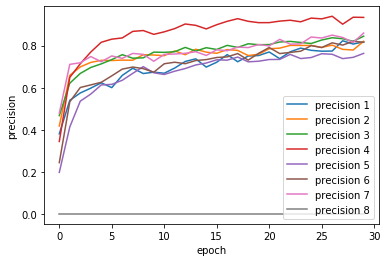

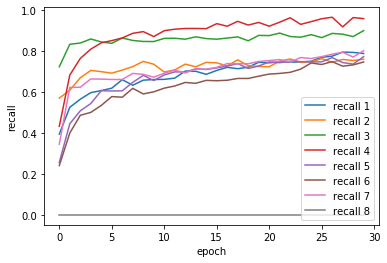

In [10]:
 # 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['prec_1'], label='precision 1')
plt.plot(hist.history['prec_2'], label='precision 2')
plt.plot(hist.history['prec_3'], label='precision 3')
plt.plot(hist.history['prec_4'], label='precision 4')
plt.plot(hist.history['prec_5'], label='precision 5')
plt.plot(hist.history['prec_6'], label='precision 6')
plt.plot(hist.history['prec_7'], label='precision 7')
plt.plot(hist.history['prec_8'], label='precision 8')
plt.xlabel('epoch')
plt.ylabel('precision')
plt.legend(loc='lower right')
plt.show()

plt.plot(hist.history['recall_1'], label='recall 1')
plt.plot(hist.history['recall_2'], label='recall 2')
plt.plot(hist.history['recall_3'], label='recall 3')
plt.plot(hist.history['recall_4'], label='recall 4')
plt.plot(hist.history['recall_5'], label='recall 5')
plt.plot(hist.history['recall_6'], label='recall 6')
plt.plot(hist.history['recall_7'], label='recall 7')
plt.plot(hist.history['recall_8'], label='recall 8')
plt.xlabel('epoch')
plt.ylabel('recall')
plt.legend(loc='lower right')
plt.show()

In [11]:
def test_metric(y_true,y_pred):
    y_true=K.point_tensor(y_true)
    y_pred = K.point_tensor(y_pred)
    return y_true - y_pred

In [13]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(test_generator, test_generator, batch_size=30)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

import numpy as np

metrics = np.array(loss_and_metrics[2:])
idx = np.linspace(0, 19, 20) 
precision = metrics[(idx % 2) == 0]
recall = metrics[((idx+1) % 2) == 0]

import matplotlib.pyplot as plt

N = 10
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
prec_bar = ax.bar(ind, precision, width, color='r')
recall_bar = ax.bar(ind + width, recall, width, color='y')

ax.set_ylabel('Scores')
ax.set_title('Precision and Recall')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'))

ax.legend((prec_bar[0], recall_bar[0]), ('Precision', 'Recall'))

plt.show()

AttributeError: 'DirectoryIterator' object has no attribute 'ndim'